In [1]:
from torch.utils.data import Dataset
import torch
import numpy as np
import h5py
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

import sys, re
sys.path.append('/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/code')

import torch
import json
from torch.utils.data import DataLoader
import os

def create_datasets(config):
    
    PATH = config["PATH_TRAIN"]

    # f = h5py.File(PATH, 'r')
    # data = np.array(f["train"]['data'][:1000])
    # print("************************************")
    # print("Size of dataset: ", data.shape)
    # print("************************************")
    # train, validation = torch.utils.data.random_split(data, [int(data.__len__()*0.8), int(data.__len__())-int(data.__len__()*0.8)], generator=torch.Generator().manual_seed(42))

    PATH = config["PATH_TRAIN"]
    f = h5py.File(PATH, 'r')
    if config["TRAINDATA"]==config["VALIDATIONDATA"]:
        data = np.array(f[config["TRAINDATA"]])
        train, validation = torch.utils.data.random_split(data, [int(data.__len__()*config["SPLIT"]), int(data.__len__())-int(data.__len__()*config["SPLIT"])], generator=torch.Generator().manual_seed(42))
    
    return train, validation

def load_model_data(SAVEPATH):
    ep = 0
    for filename in os.listdir(SAVEPATH+"checkpoints"):
        epc = int(re.findall(r'\d+', filename)[0])
        # if epc == 0:
        #     f = os.path.join(SAVEPATH, filename)
        #     FILENAME = "checkpoints/"+filename
        if epc > ep:
            f = os.path.join(SAVEPATH, filename)
            FILENAME = "checkpoints/"+filename
            ep = epc
    config = json.load(open(SAVEPATH+'config.json'))
    print(SAVEPATH+FILENAME)
    print(config["DATA_LOADER"])
    checkpoint = torch.load(SAVEPATH+FILENAME, map_location=torch.device('cpu'))
    print(" Checkpoint loaded...")
    
    ''' Model setup '''
    wrapers = __import__("wrappers.wrapers", fromlist=['object'])#.wrapers
    print(" working 1 ...")
    model = getattr(wrapers, config["MODEL_WRAPER"])(config)
    print(" Model loading... ")
    model.load_state_dict(checkpoint['state_dict'])
    print(" Model loaded... ")
    # p = kk
    # model = 0

    ''' Dataloading '''
    train_data, validation_data = create_datasets(config)
    train_data = np.array(train_data)
    validation_data = np.array(validation_data)
    
    ### > Single HDF5 file containing training and validation data 
    ld = __import__("load_data", fromlist=['object'])
    # data_set = load_data.Dataset_ae(config)
    train_set = getattr(ld, config["DATA_LOADER"])(config, train_data)
    validation_set = getattr(ld, config["DATA_LOADER"])(config, validation_data)
    
    # f = h5py.File(config["PATH_TRAIN"], 'r')
    # parameters = f["valid"]["parameters"]
    return model, train_set, validation_set#, parameters

SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/SigmaTrans/metiso/U2c0_b30_N250000/save_GNN_basis_2_BS20_2024-09-02/version_0/"
# SAVEPATH = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/metallic_only/U2c0_b30.0_metiso_1/save_GNN_basis_BS5_2024-07-31/version_0/"
model, train_set, validation_set = load_model_data(SAVEPATH)
model.model.eval()

# print((validation_set[100]["node_feature"]).shape)
random_sample = int(np.random.rand()*len(validation_set))
graph_sample = {}
graph_sample["node_feature"] = validation_set[random_sample]["node_feature"][None]
graph_sample["edge_index"] = validation_set[random_sample]["edge_index"][None]
graph_sample["vectors"] = validation_set[random_sample]["vectors"][None]
graph_sample["target"] = validation_set[random_sample]["target"][None]

# pred_ae_1 = model.model(graph_sample)
# pred_ae_1 = model.model(torch.tensor(validation_set[random_sample][0])[None])


/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/SigmaTrans/metiso/U2c0_b30_N250000/save_GNN_basis_2_BS20_2024-09-02/version_0/checkpoints/epoch=53-step=267462.ckpt
Dataset_graph_generic
 Checkpoint loaded...
 working 1 ...
 Model loading... 
 Model loaded... 


47430


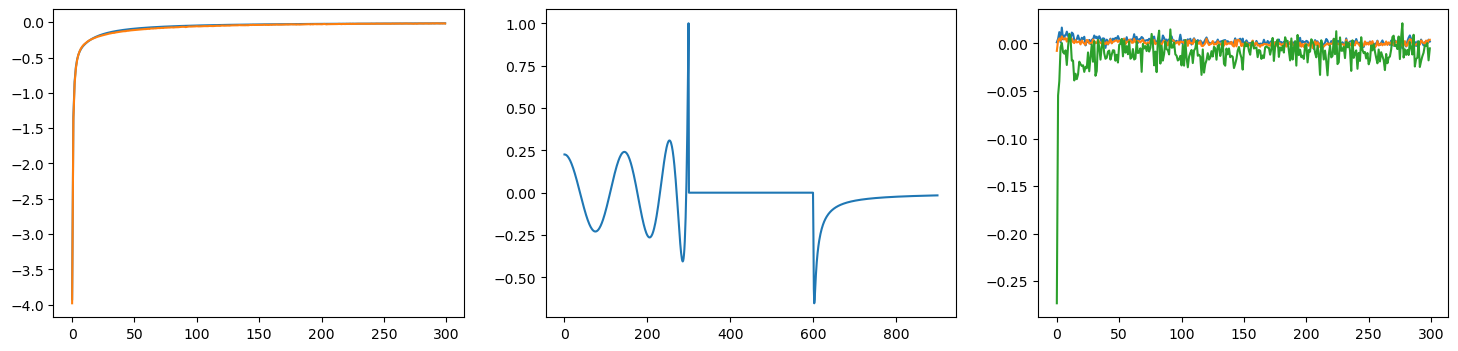

In [10]:
random_sample = int(np.random.rand()*len(validation_set))
print(random_sample)
graph_sample = {}
graph_sample["node_feature"] = validation_set[random_sample]["node_feature"][None]
graph_sample["edge_index"] = validation_set[random_sample]["edge_index"][None]
graph_sample["vectors"] = validation_set[random_sample]["vectors"][None]
graph_sample["target"] = validation_set[random_sample]["target"][None]
pred_ae_1 = model.model(graph_sample)
emb_vec = model.model.vec_embedding_mlp(graph_sample["vectors"][0]).detach().numpy()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
# print(graph_sample["target"].shape)
# print(pred_ae_1.detach().numpy().shape)
# print(graph_sample["target"].shape)

fign = 0
ax[fign].plot(graph_sample["target"][0,:])
ax[fign].plot(pred_ae_1.detach().numpy()[:300])

# print(graph_sample["vectors"].shape)

fign = 1
ax[fign].plot(graph_sample["node_feature"][0,12,:])
# ax[fign].plot(graph_sample["vectors"][0,2])
# ax[fign].plot(graph_sample["vectors"][0,12])
# ax[fign].plot(graph_sample["vector"][20])

fign = 2
ax[fign].plot(emb_vec[110,:])
ax[fign].plot(emb_vec[221,:])
ax[fign].plot(emb_vec[0,:])
